# Which Pittsburgh Tech Groups Are The Most Prominent?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### First, let's load in the dataset.

In [2]:
# The dataset we will be using can be found at my github.
# It was obtained via the meetup.com API using a custom python script I created.
# If you'd like to generate a more recent dataset on Pittsburgh and/or a different location, 
# check out https://github.com/awgraves/meetup_api

df = pd.read_csv("pgh_meetup_groups_Jan_23_2018.csv")
df.head()

name        id        city    lat  \
0         Free and Almost Free in Pittsburgh   1756412  Pittsburgh  40.47   
1         The Pittsburgh Hiking Meetup Group    513500  Pittsburgh  40.45   
2          Pittsburgh Singles Over-50 Meetup  21721579  Pittsburgh  40.45   
3  The Pittsburgh Cultural Arts Meetup Group   1318900  Pittsburgh  40.44   
4                The Pittsburgh Social Club!   1773927  Pittsburgh  40.47   

     lon              category              created  status  members  \
0 -79.95           Socializing  2010-12-30 23:15:54  active    17740   
1 -79.99  Outdoors & Adventure  2007-05-29 06:48:49  active     6873   
2 -79.99           Socializing  2016-12-30 22:38:58  active      547   
3 -79.95        Arts & Culture  2008-11-10 20:40:33  active     6245   
4 -79.92           Socializing  2011-01-27 19:15:11  active     5304   

  join_mode  past_event_count           last_event  last_rsvp  
0      open              9864  2018-01-22 19:00:00          1  
1  approval              3925  2018-01-23 06:15:00          3  
2  approval                74  2018-01-17 17:45:00         25  
3      open              1237  2018-01-21 16:25:00          4  
4      open              3595  2018-01-22 19:00:00          6

In [3]:
df.shape

(935, 13)

### The original dataset contains all meetups within a 50 mile radius, but let's only look at Pittsburgh and not the surrounding area:

In [4]:
df = df[df["city"]=="Pittsburgh"]
df.reset_index(drop=True, inplace=True)
df.shape

(683, 13)

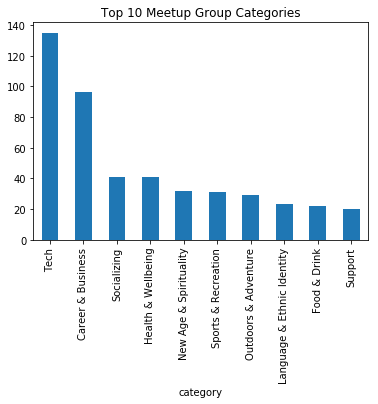

In [5]:
%matplotlib inline

#Which categories are most popular?
cat_group_counts = df.groupby("category").size().sort_values(ascending=False)[:10]

cat_group_counts.plot(kind="bar", title="Top 10 Meetup Group Categories")

In [6]:
print(cat_group_counts.keys().tolist())

['Tech', 'Career & Business', 'Socializing', 'Health & Wellbeing', 'New Age & Spirituality', 'Sports & Recreation', 'Outdoors & Adventure', 'Language & Ethnic Identity', 'Food & Drink', 'Support']


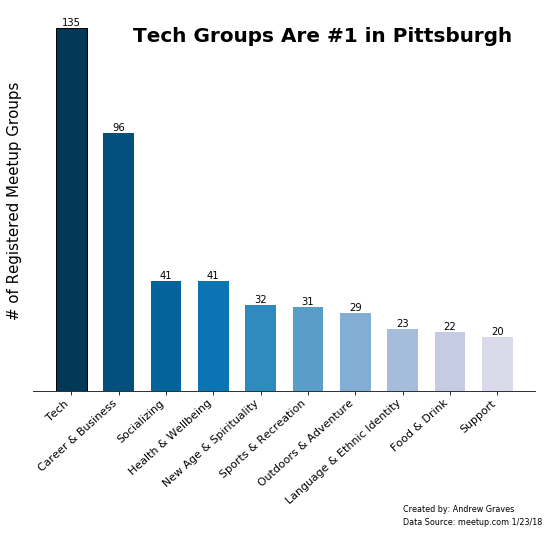

In [7]:
#Let's make this bar chart nice and pretty
from matplotlib import cm
color = cm.PuBu(np.linspace(1, .2, 10)) #import the colormap to color the bars

N = 10
group_values = cat_group_counts.tolist() #number of groups
group_labels = cat_group_counts.keys().tolist()

ind = np.arange(N)  # the x locations for the groups
width = 0.65       # the width of the bars

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1)

#line_widths = [3.0 if i == 1 else 1.0 for i in range(N)]
groups = ax.bar(ind, group_values, width, color=color, linewidth=1.0, edgecolor = "black")

# add some axis labels and clean up the graph space of unnecessary ink
ax.set_ylabel('# of Registered Meetup Groups', size=15)
ax.set_xticks(ind)
ax.set_xticklabels(group_labels, rotation = 42, ha="right", size = 11)
ax.tick_params(left="off")
ax.set_yticklabels([])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

#adding text
ax.text(1.30,130,"Tech Groups Are #1 in Pittsburgh", horizontalalignment='left', size = 20, weight="bold")
ax.text(7.0, -45, "Created by: Andrew Graves", horizontalalignment="left", size=8)
ax.text(7.0, -50, "Data Source: meetup.com 1/23/18", horizontalalignment="left", size=8)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + .2,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(groups)

#export the bar chart to a file
plt.savefig('tech_groups_pgh.jpeg', edgecolor='black', bbox_inches='tight', facecolor=fig.get_facecolor(), frameon=True)
plt.show()

# Which of the 135 different tech groups are the most prominent?

In [8]:
#only want tech groups
df = df[df["category"]=="Tech"].reset_index(drop=True)

#our category column is now redundant
df.drop(["category"], axis = 1, inplace = True)

In [9]:
df.shape

(135, 12)

In [10]:
#get rid of some unnecessary columns for the purpose of our investigation
df.drop(["id","city","lat","lon"], inplace = True, axis = 1)

In [11]:
df.head()

name              created  status  \
0  Blockchain Developers and Enthusiasts United  2017-10-28 19:35:41  active   
1                          WordPress Pittsburgh  2014-08-06 08:00:37  active   
2                      Pittsburgh Code & Supply  2014-03-20 09:40:46  active   
3                    Girl Develop It Pittsburgh  2012-06-13 20:49:34  active   
4                              PGH Data Science  2017-02-02 15:37:53  active   

   members join_mode  past_event_count           last_event  last_rsvp  
0      213      open                 6  2018-01-18 18:30:00         67  
1      819      open                57  2018-01-09 07:30:00         17  
2     3557      open               313  2018-01-05 11:00:00          8  
3     2051      open                96  2018-01-18 19:00:00         37  
4      753      open                 9  2018-01-10 16:00:00         72

In [12]:
# We don't want to join a group that is in a grace period!
df.status.value_counts()

active    135
Name: status, dtype: int64

In [13]:
#Looks like all are active, but just in case you want to load in a new dataset lets be sure we get it right...
df = df[df["status"] == "active"]

#The status column is now redundant
df.drop(["status"], axis = 1, inplace = True)
df.shape

(135, 7)

In [14]:
#we also don't really care about how the members join
df.drop(["join_mode"], axis = 1, inplace = True)

In [15]:
#one more filtering criteria:  no missing values.  The last_event column is a datetime object,
#and if there were any groups with no past events, this column will be a NaN (missing value).
df.dropna(axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)
df.shape

(115, 6)

In [16]:
#lastly, let's convert our datetime columns for later use. (We need to tell pandas these are dates)
df["created"] = pd.to_datetime(df["created"])
df["last_event"] = pd.to_datetime(df["last_event"])
df.head()

name             created  members  \
0  Blockchain Developers and Enthusiasts United 2017-10-28 19:35:41      213   
1                          WordPress Pittsburgh 2014-08-06 08:00:37      819   
2                      Pittsburgh Code & Supply 2014-03-20 09:40:46     3557   
3                    Girl Develop It Pittsburgh 2012-06-13 20:49:34     2051   
4                              PGH Data Science 2017-02-02 15:37:53      753   

   past_event_count          last_event  last_rsvp  
0                 6 2018-01-18 18:30:00         67  
1                57 2018-01-09 07:30:00         17  
2               313 2018-01-05 11:00:00          8  
3                96 2018-01-18 19:00:00         37  
4                 9 2018-01-10 16:00:00         72

## So, let's begin with the most obvious metric: membership.  

## The more members, the more thriving the group, right?  Let's take a look:

In [17]:
top_membership = df.sort_values("members", ascending=False).reset_index(drop=True)
top_membership.head(5)

name             created  members  \
0                    Pittsburgh Code & Supply 2014-03-20 09:40:46     3557   
1                  Girl Develop It Pittsburgh 2012-06-13 20:49:34     2051   
2                             Pgh Tech Meetup 2010-05-04 20:35:19     1916   
3                                     HackPGH 2015-05-27 07:38:41     1617   
4  Pittsburgh Agile (@PittAgile | #PittAgile) 2011-03-02 11:31:00     1457   

   past_event_count          last_event  last_rsvp  
0               313 2018-01-05 11:00:00          8  
1                96 2018-01-18 19:00:00         37  
2               139 2017-11-18 09:30:00          1  
3                79 2018-01-17 19:00:00         17  
4                71 2017-11-15 17:30:00         31

### Wow, not bad!  The top groups range from roughly 1.5 to 3.5 k members each!

### But wait a moment...take a look at those event rsvp counts...

### A thriving group should also have lots of rsvps, right?  Hmm...

## Ok, let's sort the groups by last rsvp count:

In [18]:
top_rsvp = df.sort_values("last_rsvp", ascending=False).reset_index(drop=True)
top_rsvp.head(5)

name             created  members  \
0                              PGH Data Science 2017-02-02 15:37:53      753   
1  Blockchain Developers and Enthusiasts United 2017-10-28 19:35:41      213   
2               Steel City Information Security 2012-10-30 12:59:15      788   
3       Google Developer Group (GDG) Pittsburgh 2017-01-24 09:29:22      377   
4                   Pittsburgh Big Data Meetups 2015-03-04 09:55:47      603   

   past_event_count          last_event  last_rsvp  
0                 9 2018-01-10 16:00:00         72  
1                 6 2018-01-18 18:30:00         67  
2                57 2018-01-10 18:00:00         50  
3                 3 2017-09-30 10:00:00         50  
4                10 2016-03-22 19:00:00         49

## PGH Data Science tops the ranking at 72!  
(As it so happens, I was at that event, and we did not have 72 people.  I would estimate it was probably more like 40.  Still pretty good!)

## RSVP count does seem like an important metric for prominence.

Yet, check out the Google Developer Group in slot 2.  It has only had **3 events in the past year!**

## Why don't we rank groups by how active they have been?


One way to do this would be to see ***which groups have had the most events.***  However, this would **bias our results towards groups that have been around longer.** 

On the other hand, if we ***rank the groups by how recent their most recent event was***, this might not tell us how frequent the groups **USUALLY** have events.

## A good solution is therefore to find the average wait time between events.  
We can calculate this by dividing the age of the group by the number of events it has had.

In [19]:
# We can create a new column with a measure of how frequently the group hosts events.

#we won't be needing the last event info now
df.drop(["last_event"], axis = 1, inplace=True)

query_date = dt.date(2018,1,23) #this is when this particular dataset was generated, so we will use it to calculate group age

df["created"] = [d.date() for d in df["created"]] #we only need the date from the original column (ignore time)
age = query_date - df["created"] #find the age in days by subtracting creation date from the date the dataset was generated
df["event_freq"] = age.dt.days / df["past_event_count"].astype(float) #needs to be float for division

In [20]:
most_active = df.sort_values("event_freq").reset_index(drop=True)
most_active.head(5)

name     created  members  \
0                           Pittsburgh Code & Supply  2014-03-20     3557   
1                                TechShop Pittsburgh  2013-03-27      663   
2                             Pittsburgh Rust Coffee  2016-08-24      219   
3  Next Gen Native Hadoop Big Data Apex Users Gro...  2016-07-06      135   
4  Big Data (Next Gen Hadoop) Ingest & Transform,...  2016-07-05      321   

   past_event_count  last_rsvp  event_freq  
0               313          8    4.488818  
1               251          0    7.023904  
2                73          7    7.082192  
3                75          3    7.546667  
4                74          6    7.662162

## Looks like the top groups hold events on a weekly basis

## For the 2nd time now Pittsburgh Code & Supply takes a top slot!

# We now have 3 criteria to evaluate and rank the tech groups:
- total membership
- last rsvp count
- event frequency

## Let's convert the scores for the criteria into percentiles and then average them for our final ranking!

In [21]:
from scipy.stats import percentileofscore

#first we need to create sorted arrays of the column data
sorted_membership = sorted(most_active["members"])
sorted_rsvp = sorted(most_active["last_rsvp"])
sorted_freq = sorted(most_active["event_freq"])

#now we can use the percentile function on the columns and calculate our scores
most_active["membership_score"] = most_active["members"].apply(lambda x: percentileofscore(sorted_membership, x))
most_active["rsvp_score"] = most_active["last_rsvp"].apply(lambda x: percentileofscore(sorted_rsvp, x))

#When it comes to frequency, smaller is better, so we subtract the percentile from 100 to reward groups with more frequent events!
most_active["freq_score"] = 100 - (most_active["event_freq"].apply(lambda x: percentileofscore(sorted_freq, x)))

#average the 3 scores for our final score and sort the dataframe on this final score
most_active["FINAL SCORE"] = most_active[["membership_score","rsvp_score","freq_score"]].mean(axis=1)
most_active.sort_values("FINAL SCORE", inplace = True, ascending = False)
most_active.reset_index(drop=True, inplace = True)

#let's clean up the output with only the scores
final_df = most_active[["name","membership_score","rsvp_score","freq_score","FINAL SCORE"]]

#since we are creating ranks, lets set the index starting with the number 1 instead of zero
final_df["Rank"] = [i for i in range(1,len(final_df) + 1)]
final_df = final_df.set_index("Rank", drop=True)
del final_df.index.name #don't display the name "rank" above the numbers
final_df.head(10)

/Users/andrewgraves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


name  membership_score  \
1                          Girl Develop It Pittsburgh         99.130435   
2                     Steel City Information Security         90.434783   
3                                    PGH Data Science         88.695652   
4          Pittsburgh Agile (@PittAgile | #PittAgile)         96.521739   
5                                             HackPGH         97.391304   
6   Code for Pittsburgh, our Region's Code for Ame...         86.086957   
7                                WordPress Pittsburgh         92.173913   
8        Blockchain Developers and Enthusiasts United         48.260870   
9                            Pittsburgh Code & Supply        100.000000   
10             Pittsburgh .NET User Group (PGHDOTNET)         93.043478   

    rsvp_score  freq_score  FINAL SCORE  
1    93.478261   87.826087    93.478261  
2    97.826087   76.521739    88.260870  
3   100.000000   71.304348    86.666667  
4    87.391304   74.782609    86.231884  
5    65.652174   93.913043    85.652174  
6    68.260870   94.782609    83.043478  
7    65.652174   86.956522    81.594203  
8    99.130435   93.043478    80.144928  
9    40.869565   99.130435    80.000000  
10   58.260870   86.086957    79.130435

# Here are our top ten most prominent tech groups in Pittsburgh!

### [Take it further]: should we weight any of the categories more heavily than the others or keep them all equal when we calculate the final score?